In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58933,48612.0,-0.821962,1.210877,1.554826,0.121854,-0.600528,-0.964738,0.237030,0.256110,-0.625520,...,0.062225,0.021746,0.023572,0.740223,-0.199583,0.157285,-0.215906,-0.003190,7.83,0
15696,27124.0,-1.794172,-1.136302,1.986137,0.214567,1.393705,-1.500460,-0.682636,0.323410,0.087396,...,0.189857,0.130808,0.063537,0.546709,0.116376,0.258626,-0.009247,0.126468,1.00,0
49533,44103.0,-0.693041,0.764389,1.998056,0.100377,-1.137246,-0.365349,-0.433140,0.577989,0.060847,...,0.397569,1.008474,-0.010437,0.410138,-0.668195,0.361616,0.034253,0.112028,23.60,0
32665,36908.0,-0.885711,0.807767,-0.205369,-1.701416,3.059094,3.092323,0.575071,0.410938,0.211563,...,-0.389612,-0.865232,-0.083211,0.930371,-0.357657,-0.171843,-0.142201,-0.135093,7.44,0
196760,131682.0,-0.504731,0.100041,1.006795,-2.270453,0.443102,-0.467552,0.985311,-0.382556,-1.827108,...,0.439399,1.218304,-0.629135,-0.423787,1.052607,0.170078,-0.199359,-0.198525,60.00,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97091.570122,-0.103380,0.047159,-0.023972,-0.082853,0.059951,-0.041386,-0.000925,-0.021738,-0.033091,...,-0.008796,0.040385,0.034722,-0.007481,-0.000151,-0.016199,-0.012481,-0.005084,0.000969,84.451778
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
58933    48612.0 -0.821962  1.210877  1.554826  0.121854 -0.600528 -0.964738   
15696    27124.0 -1.794172 -1.136302  1.986137  0.214567  1.393705 -1.500460   
49533    44103.0 -0.693041  0.764389  1.998056  0.100377 -1.137246 -0.365349   
32665    36908.0 -0.885711  0.807767 -0.205369 -1.701416  3.059094  3.092323   
196760  131682.0 -0.504731  0.100041  1.006795 -2.270453  0.443102 -0.467552   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [18]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [21]:
y_pred = model.predict(X_test)
XG_test_data_accuracy = accuracy_score(Y_test,y_pred)
XG_precision = precision_score(Y_test, y_pred)
XG_f1 = f1_score(Y_test, y_pred)
XG_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [22]:
print("XG Boost : ")
print("Accuracy : ",XG_test_data_accuracy)
print("Precision : ",XG_precision)
print("F1 : ",XG_f1)
print("Recall : ",XG_recall)
print(f'Classification Report:\n{classification_rep}')

XG Boost : 
Accuracy :  0.9594594594594594
Precision :  0.9690721649484536
F1 :  0.94
Recall :  0.912621359223301
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       193
           1       0.97      0.91      0.94       103

    accuracy                           0.96       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.96      0.96       296



/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

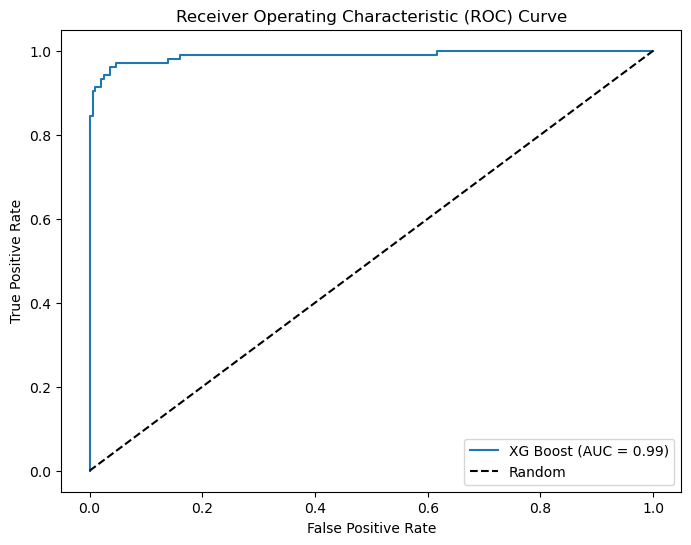

In [23]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XG Boost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()